# BANK MARKETING

## Introduction
This project is based on the Bank Marketing Dataset from the UCI Machine Learning Repository. It contains data collected from a Portuguese banking institution’s marketing campaigns. The dataset includes client information, campaign details, and economic indicators. It is well-suited for binary classification tasks and offers valuable insights into customer behavior and marketing effectiveness.

# Objective
The main objective of this project is to develop a machine learning model that can accurately predict whether a client will subscribe to a term deposit. This will help financial institutions identify potential customers, improve campaign targeting, and enhance overall marketing performance.

## Initial Step EDA (Exploratory Data Analysis)

In [77]:
# Importing necessary libraries

# Core libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Loading the data set

data = pd.read_csv("bank-full.csv", sep = ';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [79]:
# Coverting to Data Frame

df = pd.DataFrame(data)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Data description

The dataset consists of 45,211 records with 16 input features and 1 target variable. It contains client demographic data, past contact information, and socio-economic indicators. Most features are categorical, requiring preprocessing before modeling.


Feature	Description

##### age      :	Age of the client
##### job      :    Job type (e.g., admin, technician, services)
##### marital  :	Marital status
##### education :	Education level
##### default	: Has credit in default? (yes/no)
##### balance	: Average yearly account balance (in euros)
##### housing	: Has a housing loan? (yes/no)
##### loan	: Has a personal loan? (yes/no)
##### contact	: Contact communication type (cellular, telephone)
##### day_of_week :	Day of week of last contact
##### month	: Last contact month
##### duration :	Duration of last contact (in seconds)
##### campaign	: Number of contacts during this campaign
##### pdays	: Days since last contact (-1 means not previously contacted)
##### previous	: Number of contacts before this campaign
##### poutcome	: Outcome of previous marketing campaign
##### y	(Target) : Subscription to a term deposit (yes/no)?

### Initial Inspection

In [82]:
# To view first few rows 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [83]:
# To view last few rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [84]:
# To get the dataset dimensions
print(f"Dataset contain {df.shape[0]}  Rows and {df.shape[1]} Columns ")

Dataset contain 45211  Rows and 17 Columns 


In [85]:
# Renaming column 'y' as 'Target'
df.rename(columns = {'y' : 'Target'}, inplace = True)

In [86]:
# View column names
print("Columns names: \n")
print(df.columns)

Columns names: 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


#### Understand the Dataset

In [88]:
# To get the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [89]:
# Checking for missing values 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [90]:
# Checking for duplicates
df.duplicated().sum()

0

In [91]:
# Descriptive statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [92]:
# To get the number of unique values in each column
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [93]:
# Identifying numerical columns

numerical_df = df.select_dtypes ( include = 'int64')
numerical_df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


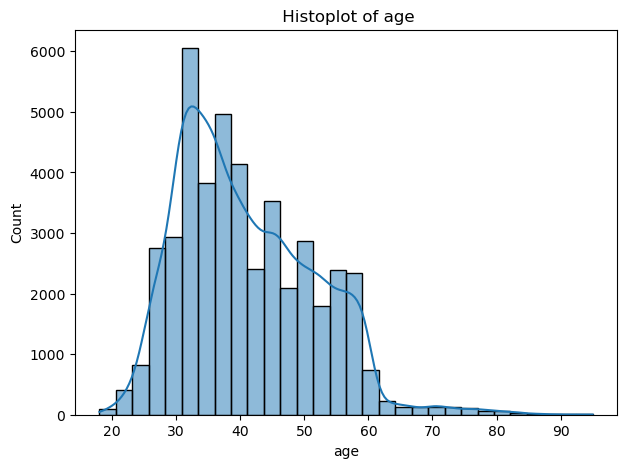

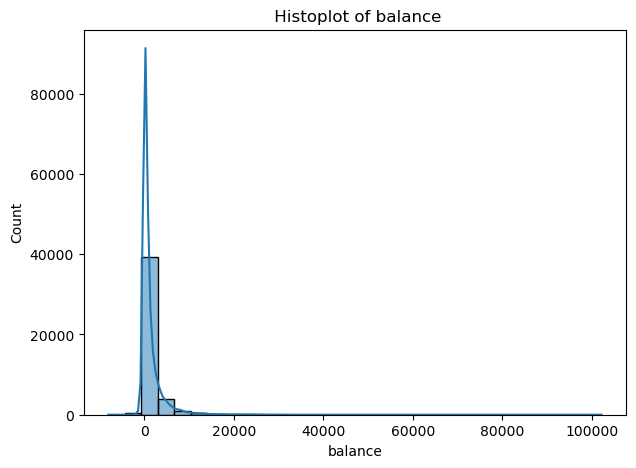

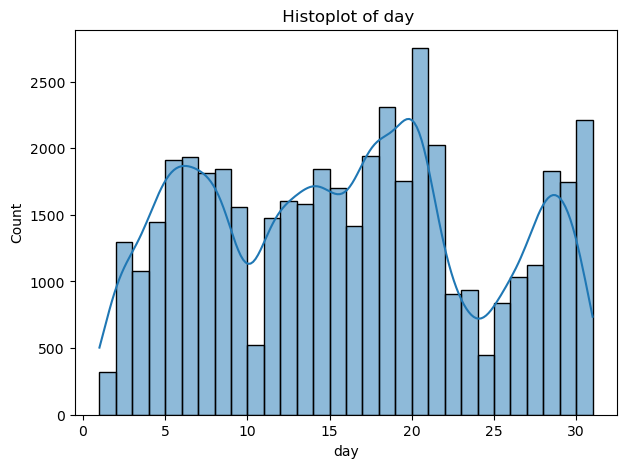

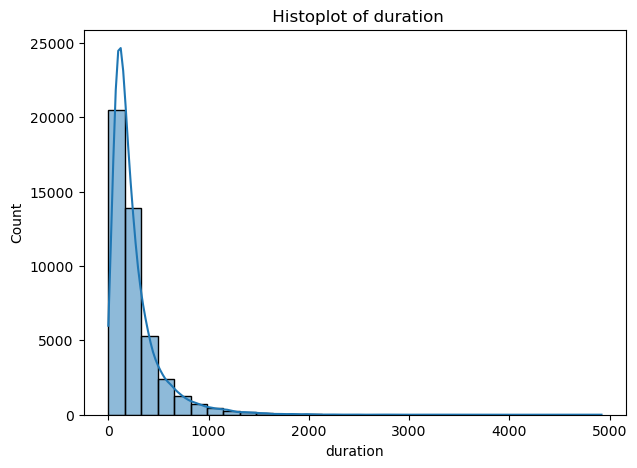

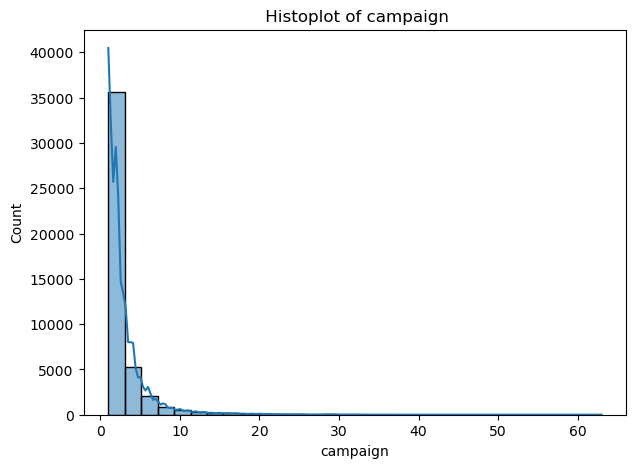

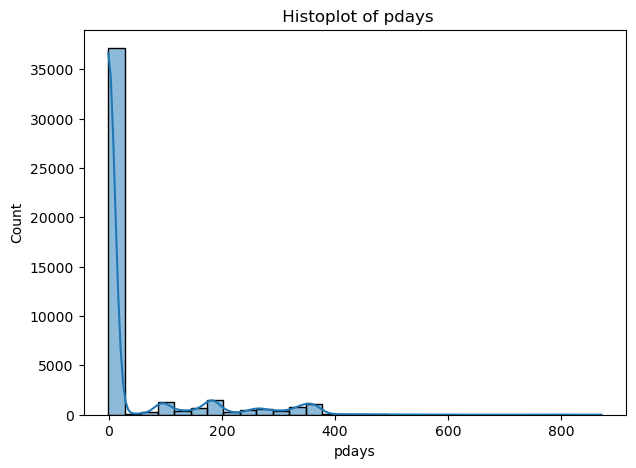

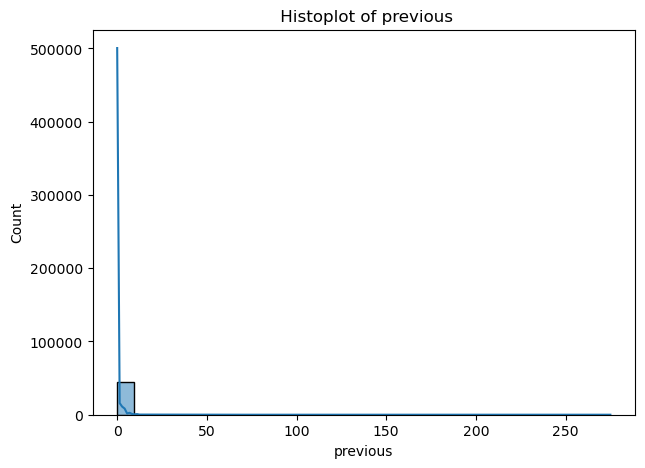

In [94]:
# Checking the distribution of Numerical columns

for col in numerical_df.columns:
    plt.figure(figsize=(7,5))
    sns.histplot(numerical_df[col], bins = 30, kde = True)
    plt.title(f' Histoplot of {col}')
    plt.show()

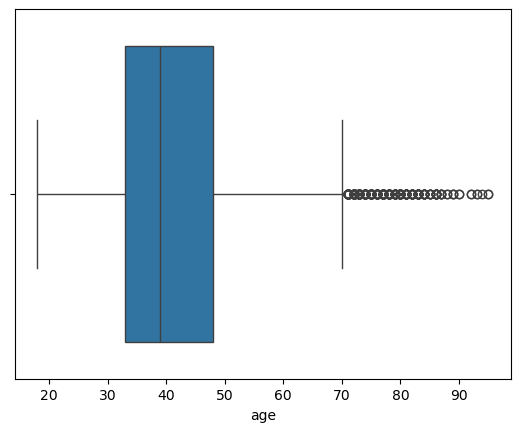

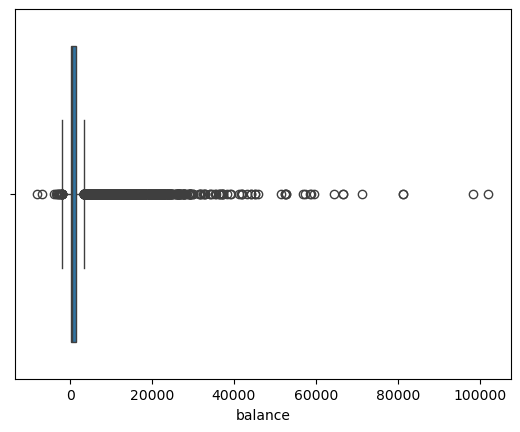

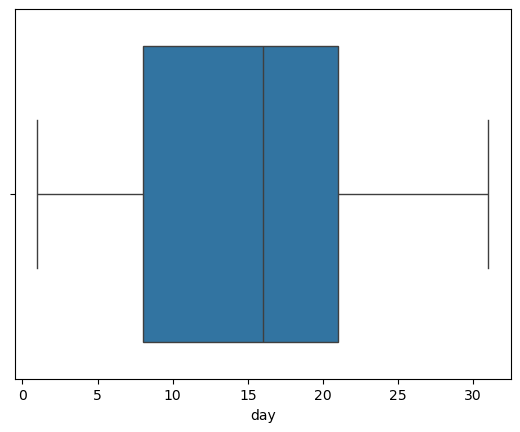

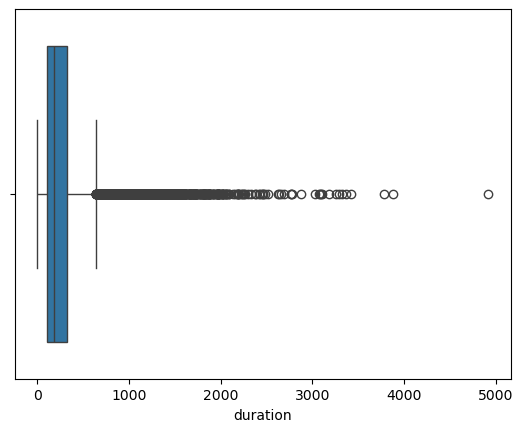

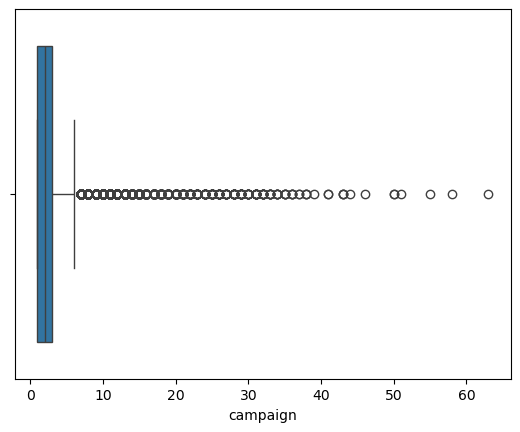

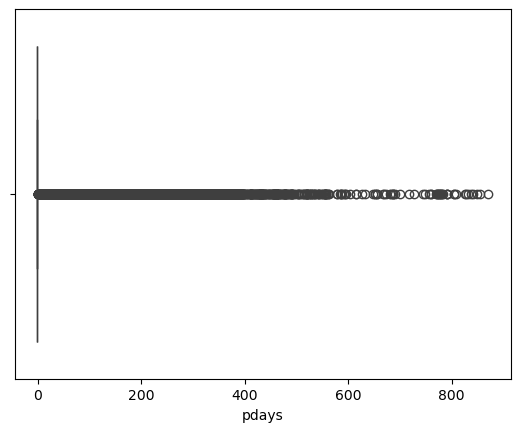

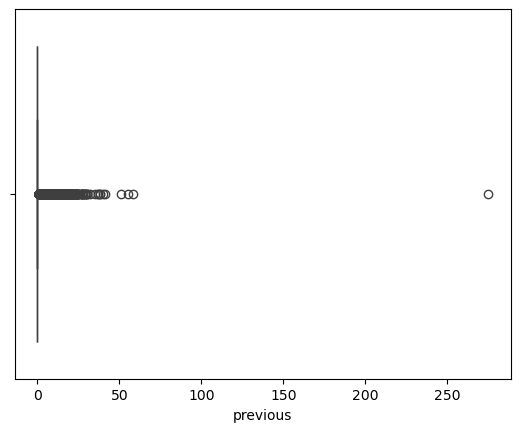

In [95]:
# Checking for Outliers
for i in numerical_df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [112]:
# IQR Method
def outliers(df):
    for col in numerical_df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [118]:
# Calling the function
df1 = outliers(df)

In [120]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,643.0,3.0,-1.0,0.0,unknown,yes
45207,70.5,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2.0,-1.0,0.0,unknown,yes
45208,70.5,retired,married,secondary,no,3462.0,no,no,cellular,17,nov,643.0,5.0,-1.0,0.0,success,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4.0,-1.0,0.0,unknown,no


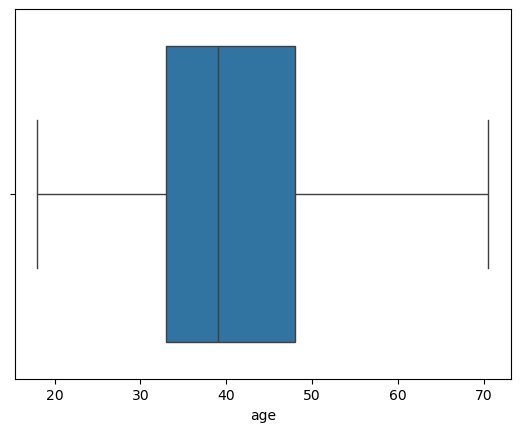

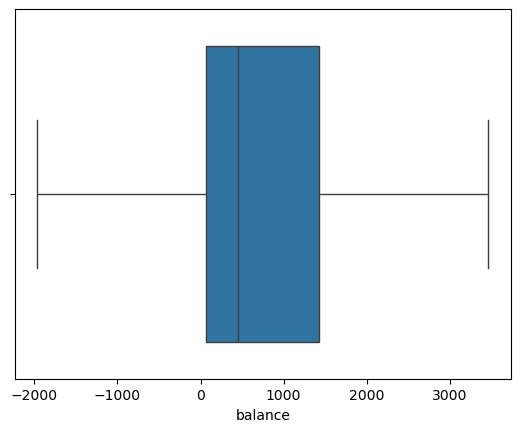

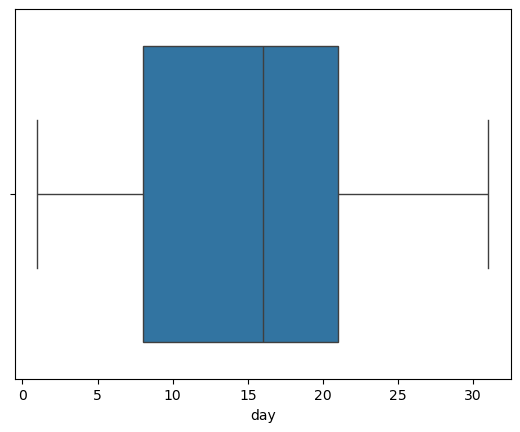

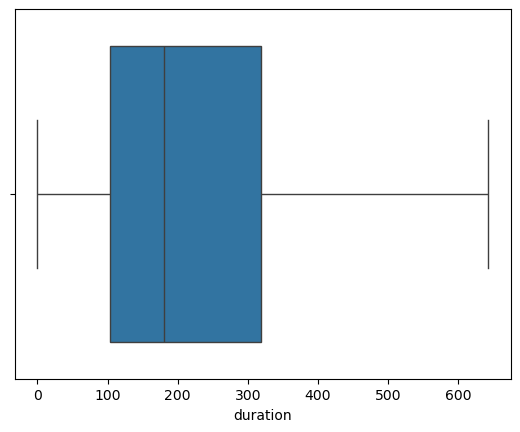

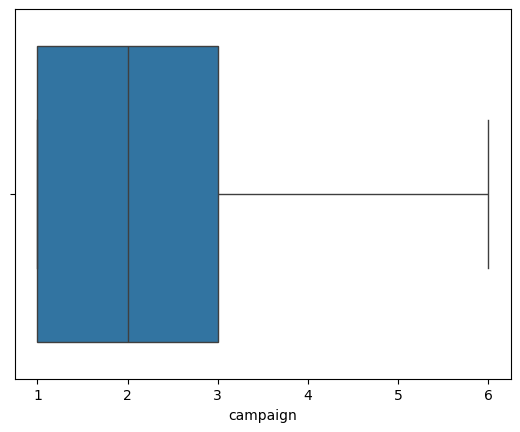

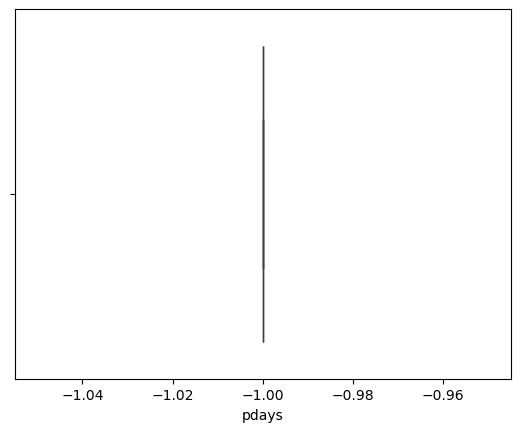

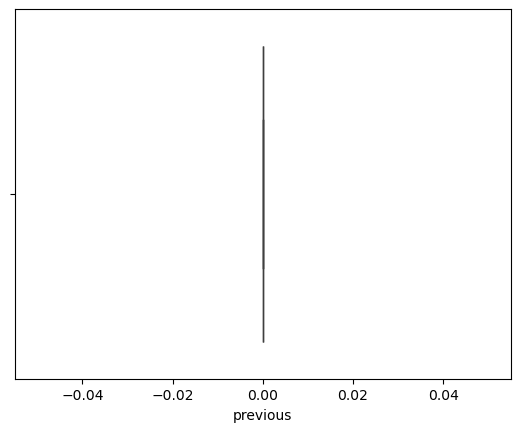

In [122]:
# Checking again to confirm there are no outliers
for i in numerical_df.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

In [124]:
# Identifying categorical columns
categorical_df = df.select_dtypes(include='object')
categorical_df

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


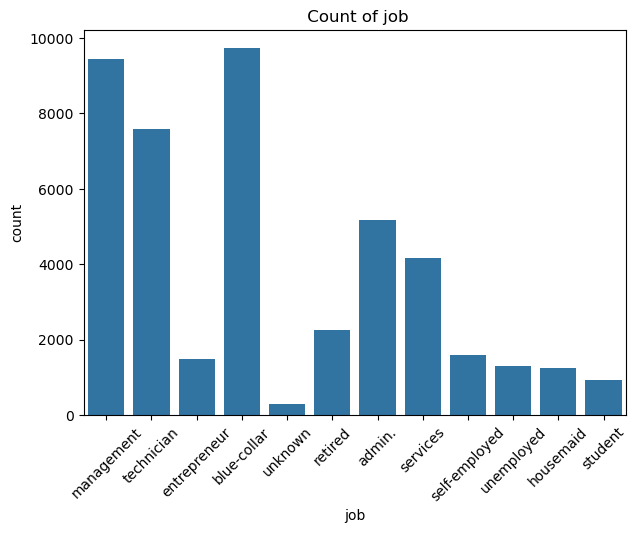

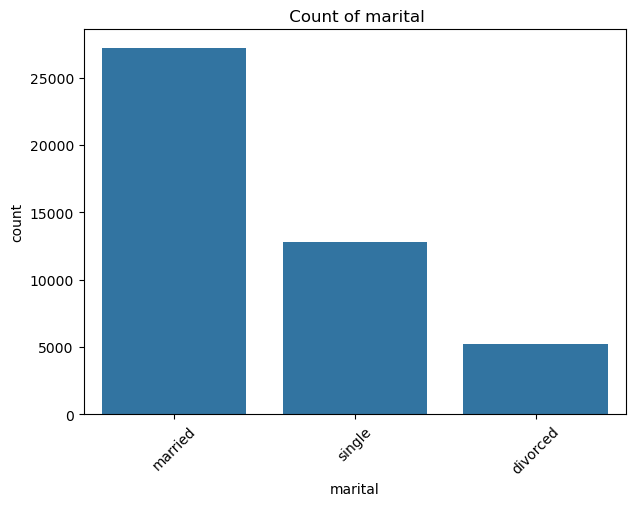

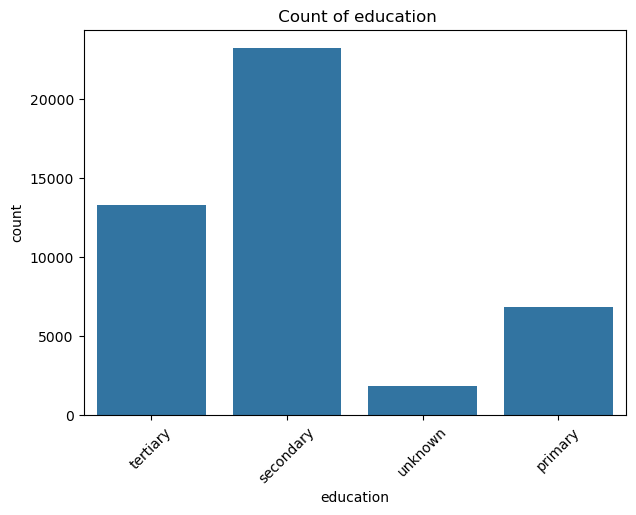

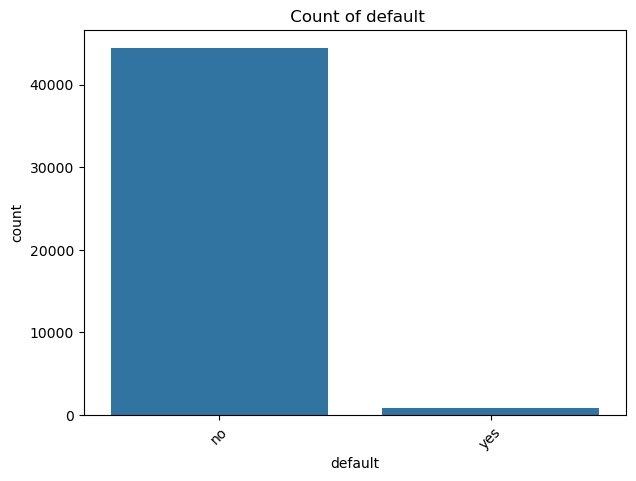

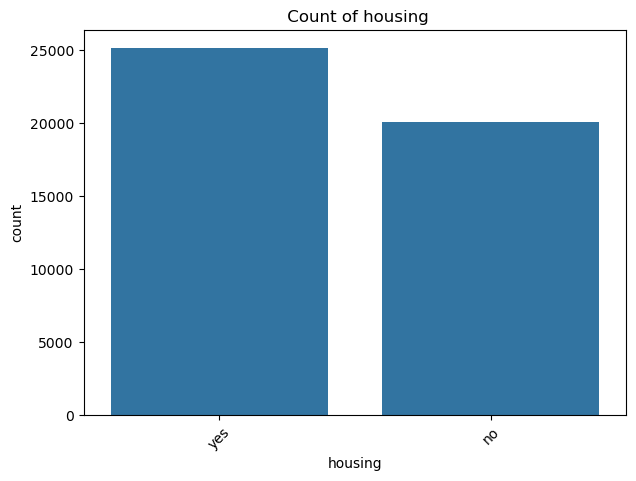

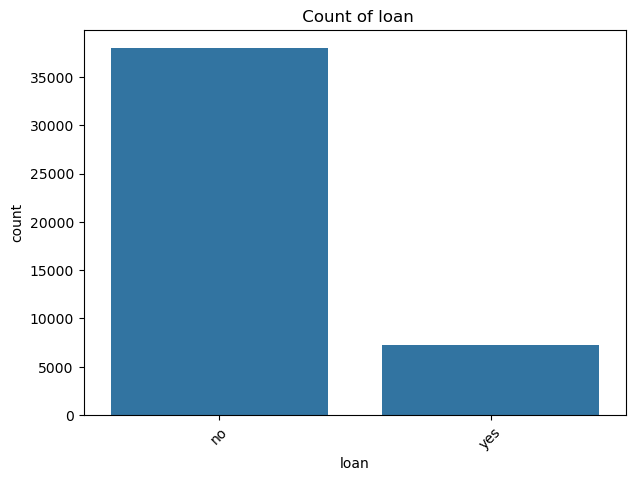

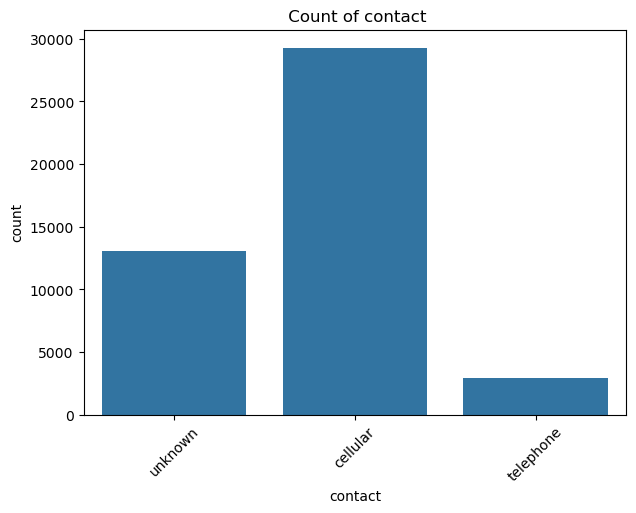

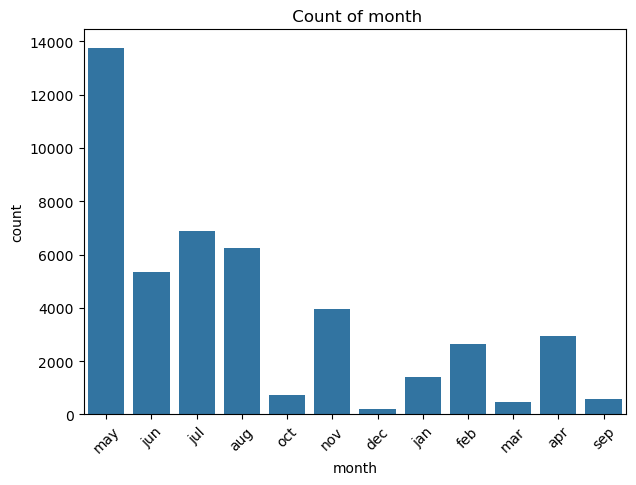

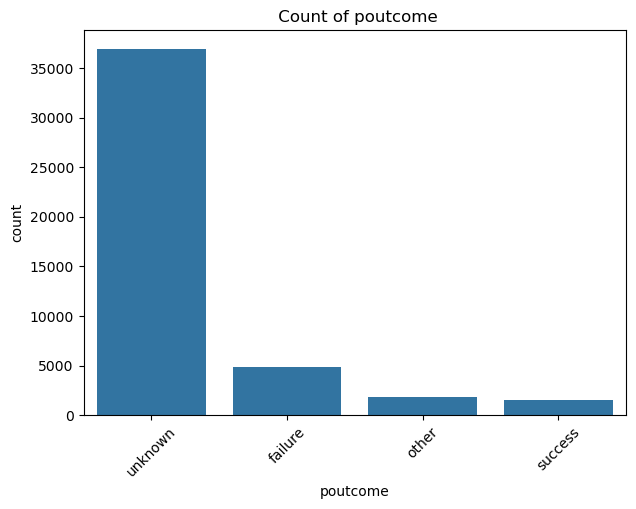

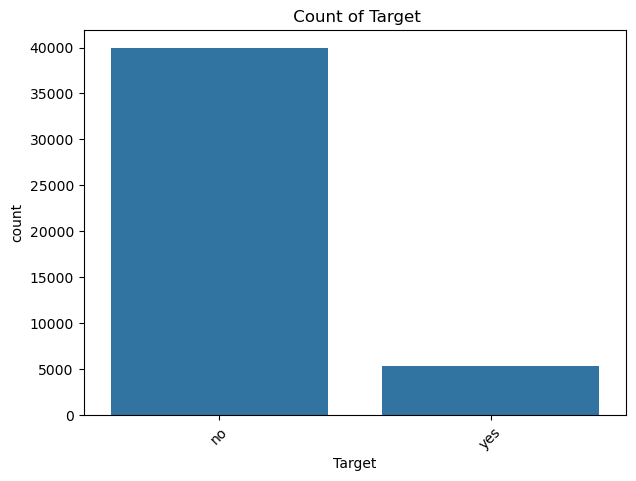

In [126]:
# Checking the distribution of Categorical columns

for col in categorical_df:
    plt.figure(figsize=(7,5))
    sns.countplot( data = df, x= col)
    plt.title(f' Count of {col}')
    plt.xticks ( rotation = 45)
    plt.show()